In [34]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import numpy as np
import re,os, random, subprocess
import MAP_paths

In [40]:
os.chdir('C:/Users/Manajit/Dropbox/My PC (LAPTOP-RNB01NCM)/Desktop')

In [2]:
smiles=['CP(C1=CC=CC=C1)C(C)C2=CC=CC=C2', 'CP(C1=CC=CC=C1)CC', 'CCP(C1=CC=CC=C1)C2CCCC2']

In [3]:
mols=[Chem.MolFromSmiles(i) for i in smiles]

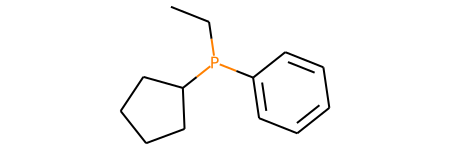

In [6]:
mols[2]

In [7]:
import pandas as pd

In [8]:
df=pd.DataFrame(zip(smiles, mols ))

In [10]:
df.columns=['smile', 'mol']

In [11]:
df

,smile,mol
0,CP(C1=CC=CC=C1)C(C)C2=CC=CC=C2,<rdkit.Chem.rdchem.Mol object at 0x00000218085...
1,CP(C1=CC=CC=C1)CC,<rdkit.Chem.rdchem.Mol object at 0x00000218085...
2,CCP(C1=CC=CC=C1)C2CCCC2,<rdkit.Chem.rdchem.Mol object at 0x00000218085...


In [18]:
rxn = AllChem.ReactionFromSmarts('[P:1].[F:2]>>[P+:1][F:2]')

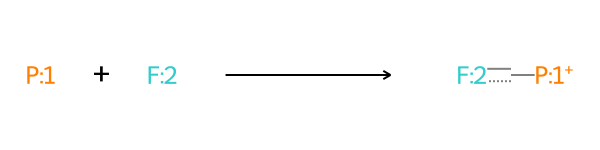

In [19]:
rxn

In [23]:
ps = [rxn.RunReactants((Chem.MolFromSmiles(i), Chem.MolFromSmiles('F'))) for i in df['smile']]

In [32]:
df['pro_smiles']=[Chem.MolToSmiles(i[0][0]) for i in ps]

In [31]:
pro_smiles

['CC(c1ccccc1)[P+](C)(F)c1ccccc1',
 'CC[P+](C)(F)c1ccccc1',
 'CC[P+](F)(c1ccccc1)C1CCCC1']

In [38]:
df['name']=['mol1.sdf', 'mol2.sdf', 'mol3.sdf']

In [39]:
df

,smile,mol,pro_smiles,name
0,CP(C1=CC=CC=C1)C(C)C2=CC=CC=C2,<rdkit.Chem.rdchem.Mol object at 0x00000218085...,CC(c1ccccc1)[P+](C)(F)c1ccccc1,mol1.sdf
1,CP(C1=CC=CC=C1)CC,<rdkit.Chem.rdchem.Mol object at 0x00000218085...,CC[P+](C)(F)c1ccccc1,mol2.sdf
2,CCP(C1=CC=CC=C1)C2CCCC2,<rdkit.Chem.rdchem.Mol object at 0x00000218085...,CC[P+](F)(c1ccccc1)C1CCCC1,mol3.sdf


In [37]:
def smile_to_SDF(smile, file_name):
    mol=Chem.MolFromSmiles(smile)
    hmol=Chem.AddHs(mol)
    AllChem.EmbedMolecule(hmol, AllChem.ETKDG())
    print(AllChem.UFFOptimizeMolecule(hmol, 1000 ))
    writer = Chem.SDWriter(file_name)
    writer.write(hmol)
    return(file_name)

def parse_SDF(sdf_file_name):
    try:
        fo=open(sdf_file_name, 'r')
        data=fo.readlines()
        fo.close()
    except:
        print(">> ERROR: cannot open the sdf file")
        return ""
    xyz_block=''

    #find and crop xyz block
    for i in range(len(data)-1):
        m = re.search('((-)?(\d)+.(\d)+(\s){1,}){3}([a-zA-Z]{1,2})', data[i])
        if m:
            # we found the first line in the coordinates block
            # need to save the charge and multiplicity
            t = (m.group(0)).split()
            coord = t[-1] + '\t' + t[0]+ '\t' + t[1]+ '\t' + t[2]+ '\n'
            xyz_block = xyz_block + (coord)
            #print (coord)

    return xyz_block

def create_guassianINP(filename, coordinates_list, charge, multiplicity, option):
    my_template=MAP_paths.ALL_OPTIONS.get(option)
    my_input=(my_template.substitute(TITLE=(filename.split('.com')[0]), CHARGE=charge, MULT=multiplicity, XYZ=coordinates_list))
    fw=open(filename, 'w')
    fw.write(my_input)
    fw.close()
    return (filename)

def MAP_generate_g09(smile, file_name, charge, option):
    my_sdf=smile_to_SDF(smile, file_name)
    coordinates=parse_SDF(my_sdf)
    gaussian_name=my_sdf.split('.sdf')[0]+'_'+option+'.com'
    file_created=create_guassianINP(gaussian_name, coordinates, charge, 1, option)
    print('>>', file_created)

In [45]:
[MAP_generate_g09(i, j, 0, 'OPT') for i, j in zip(df['pro_smiles'], df['name'])]

0
>> mol1_OPT.com
0
>> mol2_OPT.com
0
>> mol3_OPT.com


[None, None, None]

In [53]:
smi = 'CC(c1ccccc1)[P+](C)(F)c1ccccc1'
mol = Chem.MolFromSmiles(smi)
patt = Chem.MolFromSmarts('PF')
hit_ats = list(mol.GetSubstructMatch(patt))

In [54]:
hit_ats

[8, 10]